## Assignment 1b: Time Series Forecasting

### Kusal Bista a1881044

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### 1.1 Importing libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, r2_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import  SARIMAX
from  statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from itertools import product
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout  # Import Dropout layer from Keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVR
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from sklearn.linear_model import Ridge


In [5]:
# !pip install pmdarima
# !pip install seaborn

In [6]:
# reading  the dataset
dataset = pd.read_csv("energydata_complete.csv")

In [7]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
#checking the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
# checking shape
dataset.shape

(19735, 29)

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [11]:
# checking for null values
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### 2. Analyse and visualise the data

In [12]:
df_timeseries = dataset.copy()

In [13]:
df_timeseries = df_timeseries[['date', 'Appliances']]
# convert the date column of a DataFrame df to a datetime format
df_timeseries['date'] = pd.to_datetime(df_timeseries['date'], format = '%d/%m/%Y %H:%M')

In [14]:
df_timeseries.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [15]:
df_timeseries.index = df_timeseries['date']

In [16]:
df_timeseries.head()

,date,Appliances
date,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60
2016-01-11 17:10:00,2016-01-11 17:10:00,60
2016-01-11 17:20:00,2016-01-11 17:20:00,50
2016-01-11 17:30:00,2016-01-11 17:30:00,50
2016-01-11 17:40:00,2016-01-11 17:40:00,60


In [17]:
del df_timeseries['date']

In [18]:
df_timeseries.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


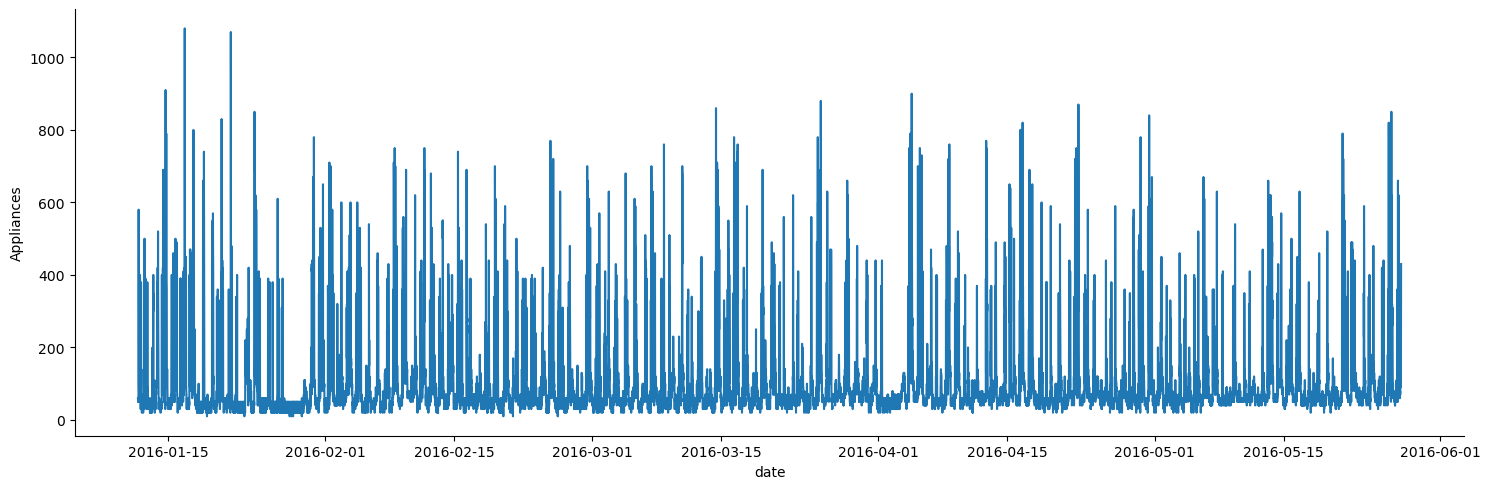

In [19]:
sns.relplot(data=df_timeseries, x="date", y="Appliances", kind="line", height=5, aspect=3)

**The energy consumption by appliances tends to be higher at the beginning of year, with January 2016 recording the highest usage. Notably, energy consumption by appliance­s peaks at month start and end but varies mid-month.**

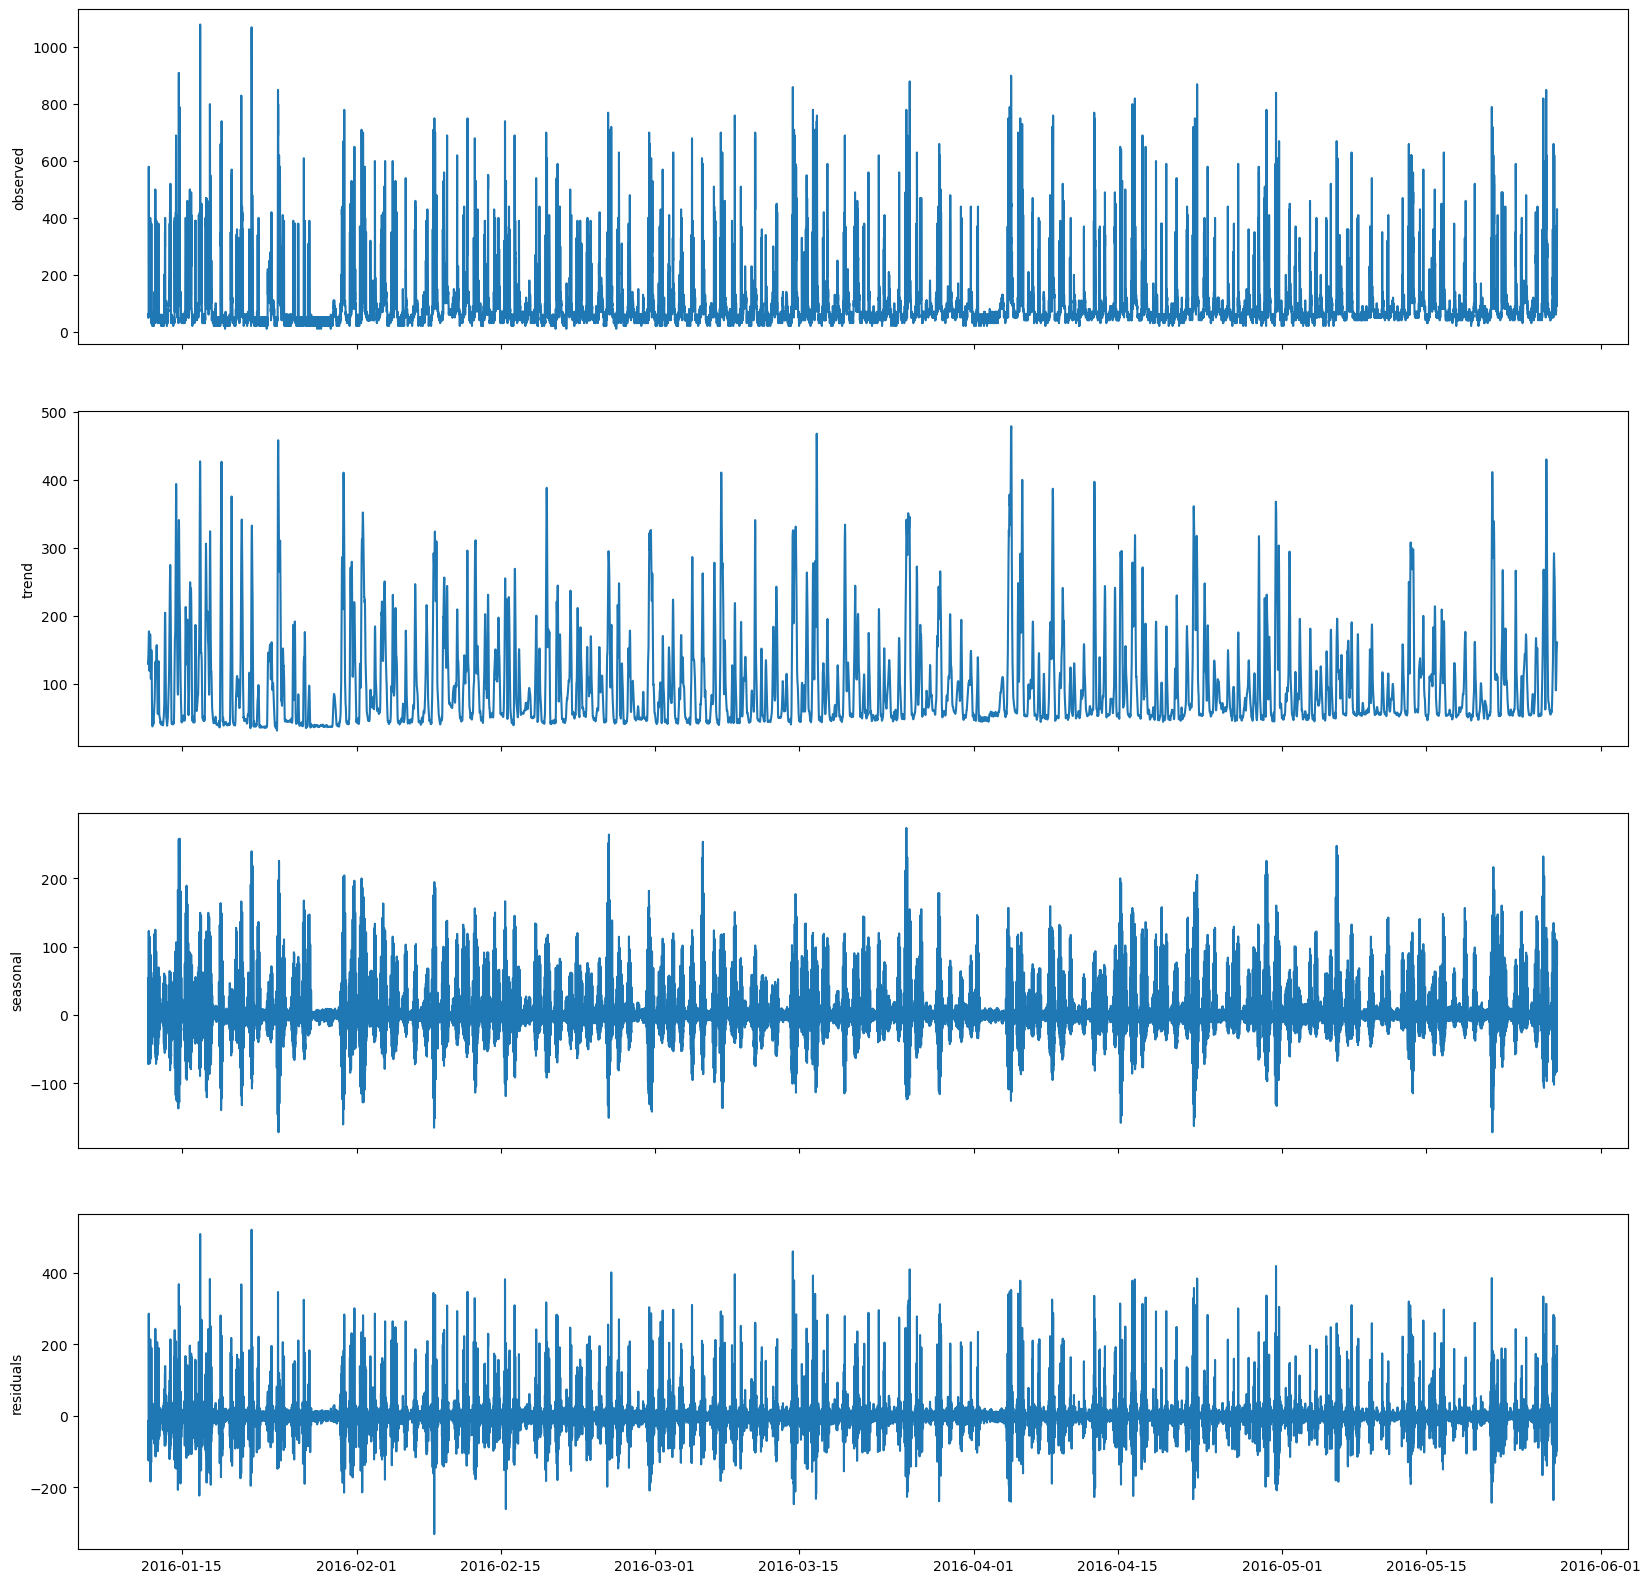

In [20]:
# Performing seasonal decomposition with a different frequency
decomposition = STL(df_timeseries['Appliances'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20), sharex=True)

# Plot the decomposition components
ax1.plot(decomposition.observed)
ax2.plot(decomposition.trend)
ax3.plot(decomposition.seasonal)
ax4.plot(decomposition.resid)

ax1.set_ylabel('observed')
ax2.set_ylabel('trend')
ax3.set_ylabel('seasonal')
ax4.set_ylabel('residuals')

plt.show()


**Key observation**

1. **Trend**: The data does not show any pattern evolving over time indicating that there are no increases or decreases, in the use of energy by appliances.

2. **Seasonal Patterns**: The fluctuations, in energy consumption based on seasons seem to be spread out across the timeline.

The plot does not show any clear trend. However, there is a consistent seasonal change evident. Additionally, there are irregular fluctuations, which likely represent outliers and missing data points..

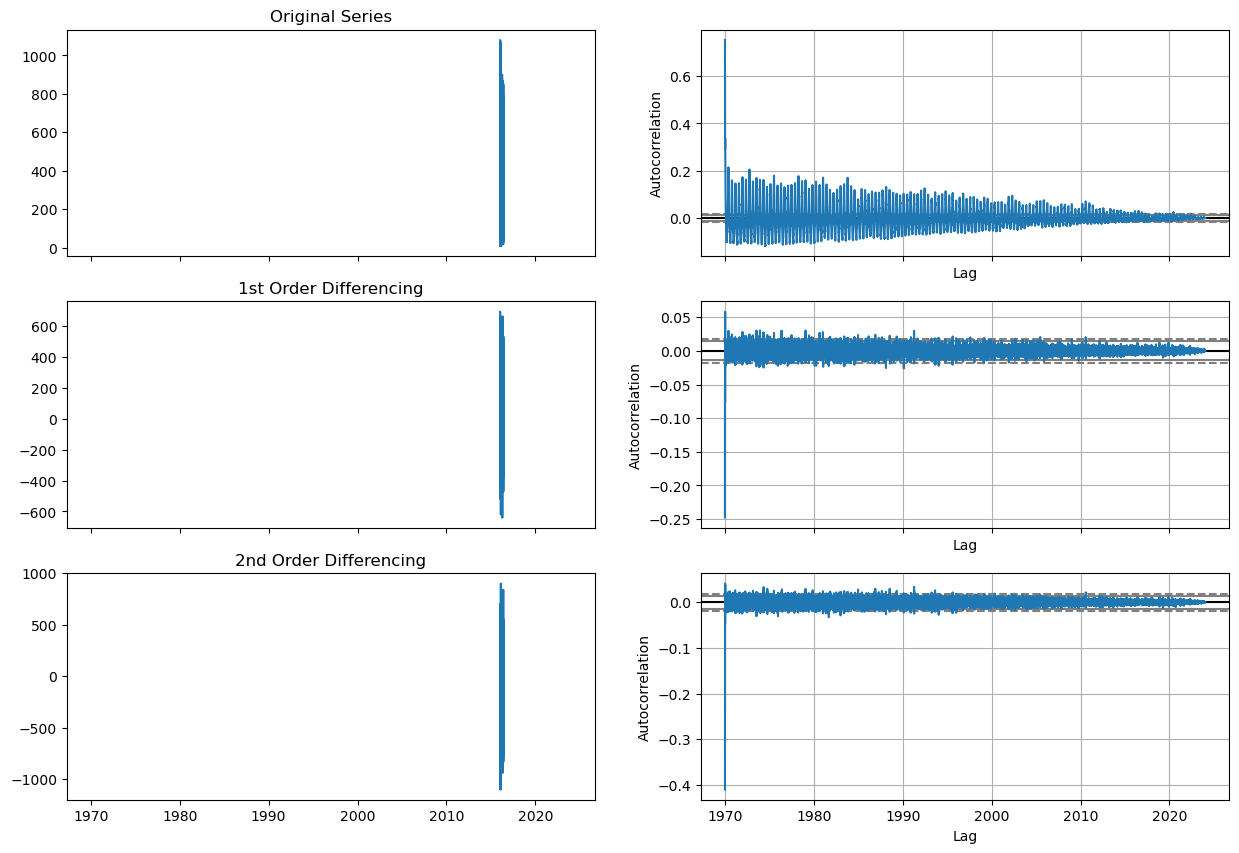

In [21]:
# Original Series
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True)
axes[0, 0].plot(df_timeseries.index, df_timeseries); axes[0, 0].set_title('Original Series')
autocorrelation_plot(df_timeseries, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_timeseries.index, df_timeseries.diff()); axes[1, 0].set_title('1st Order Differencing')
autocorrelation_plot(df_timeseries.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_timeseries.index, df_timeseries.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
autocorrelation_plot(df_timeseries.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

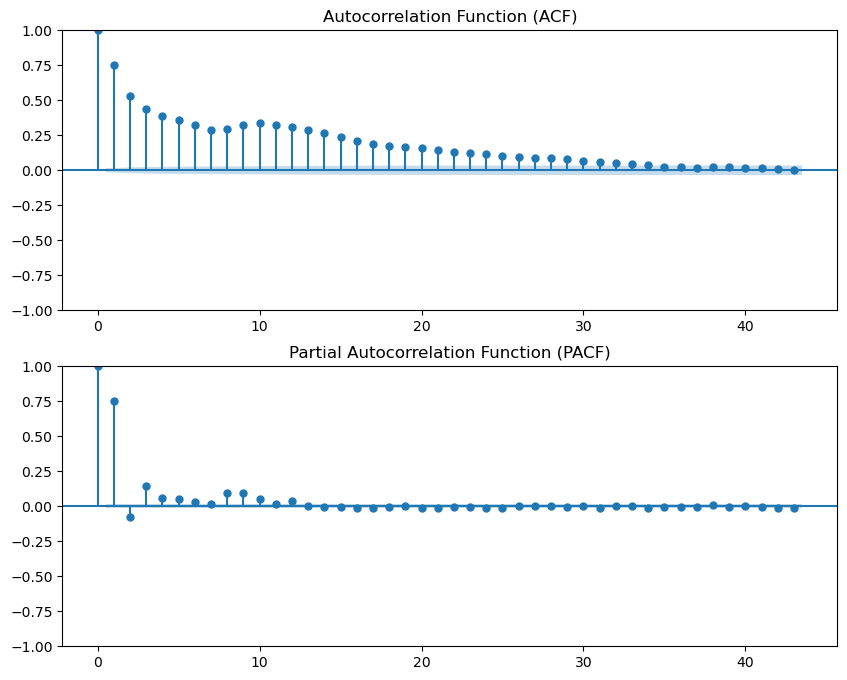

In [22]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting ACF
plot_acf(df_timeseries['Appliances'], ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plotting PACF
plot_pacf(df_timeseries['Appliances'], ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [23]:
result = adfuller(df_timeseries['Appliances'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -21.61637819803621
p-value: 0.0
Critical Values:
   1%: -3.430681600227742
   5%: -2.8616865555329394
   10%: -2.566848007525354


Here, augmented Dickey Fuller test (ADF) is used to test if the time series is stationarity or non-stationary.The null hypothesis of the ADF test is that the time series is non-stationary. In our case, p-value is 0 and ADF statistics is significantly lower than the critical values for all levels. Hence, we reject the null null hypothesis of non-stationarity. This concludes the time series is stationary and we can proceed forward.

### 3. Pre-process the data

In [24]:
df_timeseries.head()

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


In [25]:
tf.random.set_seed(7)

In [26]:
#80-20 Split
train_size = int(len(df_timeseries) * 0.8)

# Splitting the data into train and test sets
train_data = df_timeseries.iloc[:train_size]
test_data = df_timeseries.iloc[train_size:]

# Print the lengths of the train and test sets
print("Train set length:", len(train_data))
print("Test set length:", len(test_data))

Train set length: 15788
Test set length: 3947


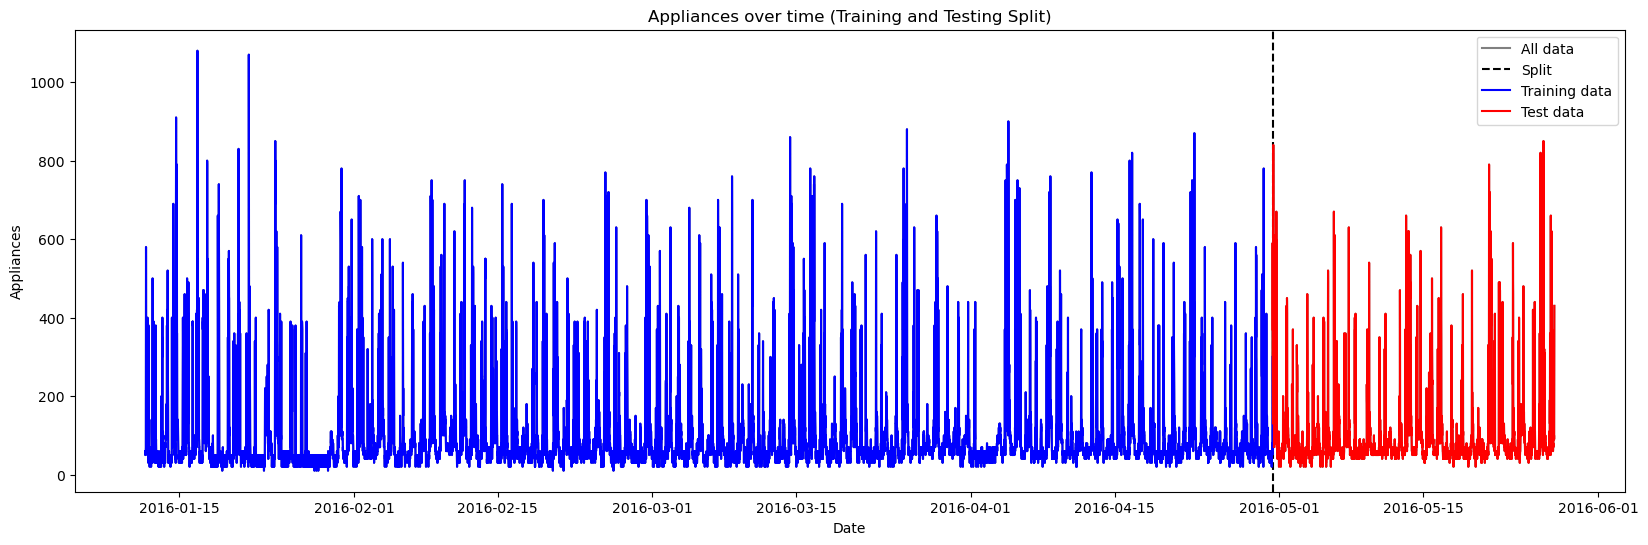

In [27]:
# Plotting the Appliances over time
plt.figure(figsize=(20,6))
plt.plot(df_timeseries['Appliances'], color='gray', label='All data')

# Plotting the training and testing split
split_index = len(train_data)
plt.axvline(x=df_timeseries.index[split_index], color='black', linestyle='--', label='Split')

plt.plot(train_data, color='blue', label='Training data')
plt.plot(test_data, color='red', label='Test data')

plt.legend()
plt.title('Appliances over time (Training and Testing Split)')
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.show()

In [28]:
data = dataset.copy()

In [29]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [30]:
#Scalling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scalar = scaler.fit_transform(df_timeseries)

In [31]:
sessions_per_day = 12
look_back = sessions_per_day * 6 
num_samples = len(data_scalar) - look_back - 1
train_X = np.empty((num_samples, look_back, 1))
train_y = np.empty(num_samples)

for i in range(num_samples):
    a = data_scalar[i:(i + look_back), 0]
    train_X[i] = a.reshape(-1, 1)
    train_y[i] = data_scalar[i + look_back, 0]

In [32]:
num_samples_test = len(data_scalar) - look_back - 1
test_X = np.empty((num_samples_test, look_back, 1))
test_y = np.empty(num_samples_test)

# Extracting predicted test data, storing, and reshaping
for i in range(num_samples_test):
    a = data_scalar[i:(i + look_back), 0]
    test_X[i] = a.reshape(-1, 1)
    test_y[i] = data_scalar[i + look_back, 0]

In [33]:
# target = np.cbrt(data['Appliances']) # target transform
x = data.drop(['Appliances','date','Windspeed','Visibility','Tdewpoint'],axis=1)
y = data['Appliances']

In [34]:
min_max_scaler = StandardScaler()
X_train_, X_test_, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train = min_max_scaler.fit_transform(X_train_)
X_test= min_max_scaler.transform(X_test_)

In [35]:
y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented.


### 4. Implement, train and test prediction models

In [42]:
# Auto ARIMA model selection
model = auto_arima(train_data.values, max_p = 15 , start_q = 0, max_q = 15 , max_P = 15 , max_Q = 15 , m = 2, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(1,0,1)[2] intercept   : AIC=178009.962, Time=11.08 sec
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=191820.430, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[2] intercept   : AIC=178020.849, Time=6.09 sec
 ARIMA(0,0,1)(0,0,1)[2] intercept   : AIC=179580.068, Time=6.43 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=201686.541, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[2] intercept   : AIC=178008.497, Time=6.77 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=178394.945, Time=0.41 sec
 ARIMA(1,0,0)(0,0,2)[2] intercept   : AIC=178009.833, Time=8.35 sec
 ARIMA(1,0,0)(1,0,2)[2] intercept   : AIC=178012.200, Time=15.21 sec
 ARIMA(0,0,0)(0,0,1)[2] intercept   : AIC=188034.406, Time=2.70 sec
 ARIMA(1,0,1)(0,0,1)[2] intercept   : AIC=178009.523, Time=8.94 sec
 ARIMA(1,0,0)(0,0,1)[2]             : AIC=178753.066, Time=1.22 sec

Best model:  ARIMA(1,0,0)(0,0,1)[2] intercept
Total fit time: 67.475 seconds


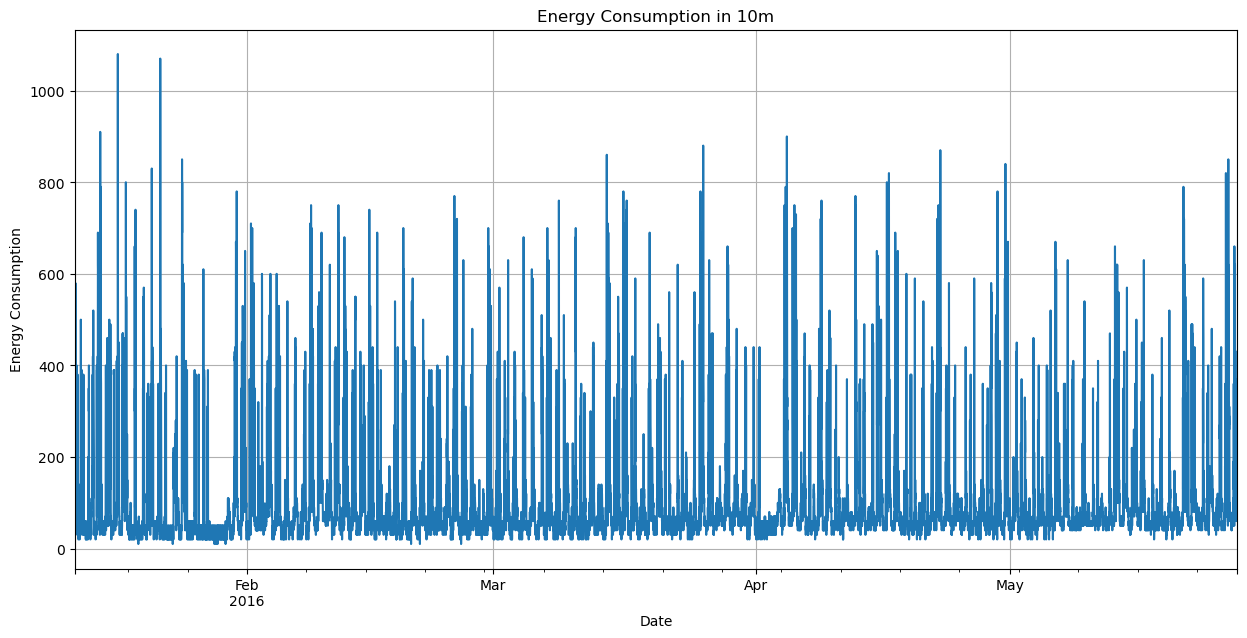

In [43]:
plt.figure(figsize=(15, 7))
df_timeseries['Appliances'].plot()
plt.title('Energy Consumption in 10m')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

In [56]:
arima_model = ARIMA(train_data.values, order=(1,0,1)) 
arima_model = arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                15788
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -89125.804
Date:                Sun, 17 Mar 2024   AIC                         178259.609
Time:                        18:23:09   BIC                         178290.277
Sample:                             0   HQIC                        178269.758
                              - 15788                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.0245      3.886     25.226      0.000      90.408     105.641
ar.L1          0.6948      0.005    132.399      0.000       0.685       0.705
ma.L1          0.1445      0.005     26.470      0.0

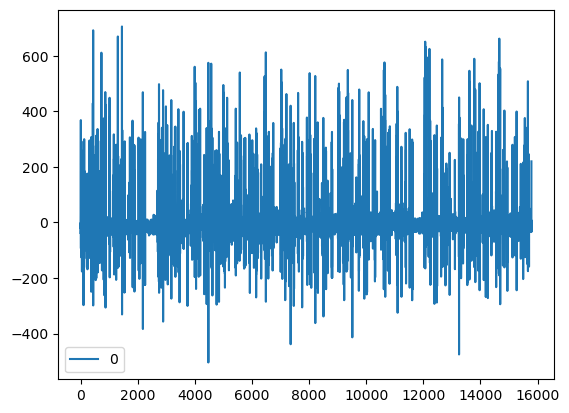

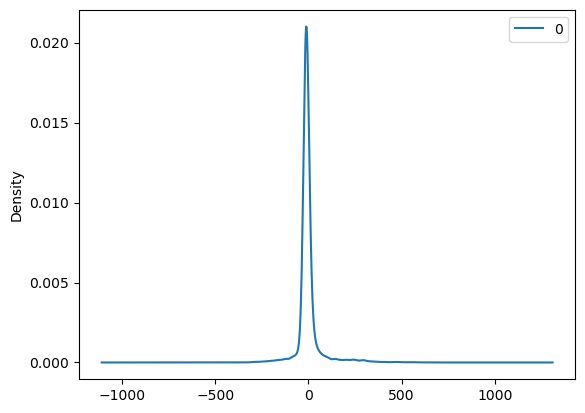

                  0
count  15788.000000
mean       0.009347
std       68.458805
min     -504.055851
25%      -19.704445
50%      -10.028166
75%        1.989810
max      705.496407


In [57]:
# plot residual errors
residuals = pd.DataFrame(arima_model.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [46]:
len(test_data.values)

3947

In [58]:
history = [x for x in train_data.values]
predictions = []

for test in range(len(test_data.values)):
    # Fit an ARIMA model on the training data
    model = ARIMA(history, order=(1,0,1))  
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  
    predictions.append(yhat)  
    
    # Get the actual observation from the test set
    obs = test_data.values[test]
    history.append(obs)
    print('Predicted = %f--->Expected=%f' % (yhat, obs))

error_arima = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % error_arima)
rmse_arima = np.sqrt(error_arima)
print('Test RMSE: %.3f' % rmse_arima)

Predicted = 270.137239--->Expected=370.000000
Predicted = 301.446128--->Expected=590.000000
Predicted = 481.845880--->Expected=320.000000
Predicted = 229.044390--->Expected=310.000000
Predicted = 257.059530--->Expected=260.000000
Predicted = 211.124687--->Expected=190.000000
Predicted = 158.985754--->Expected=150.000000
Predicted = 132.909530--->Expected=130.000000
Predicted = 119.873339--->Expected=290.000000
Predicted = 255.982378--->Expected=490.000000
Predicted = 404.389504--->Expected=840.000000
Predicted = 677.695311--->Expected=700.000000
Predicted = 520.573788--->Expected=430.000000
Predicted = 315.985969--->Expected=300.000000
Predicted = 236.306417--->Expected=310.000000
Predicted = 256.323084--->Expected=290.000000
Predicted = 236.608334--->Expected=300.000000
Predicted = 247.903725--->Expected=240.000000
Predicted = 195.795242--->Expected=160.000000
Predicted = 136.056487--->Expected=90.000000
Predicted = 85.841630--->Expected=70.000000
Predicted = 76.310659--->Expected=80.

In [59]:
# result = pd.concat([test_data, ARIMA_pred], axis=1)
# Convert ARIMA_pred to DataFrame
arima_pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['predicted_mean'])

# Concatenate test_data and ARIMA_pred_df
result = pd.concat([test_data, arima_pred_df], axis=1)

In [60]:
result

,Appliances,predicted_mean
date,,
2016-04-30 08:20:00,370,270.137239
2016-04-30 08:30:00,590,301.446128
2016-04-30 08:40:00,320,481.845880
2016-04-30 08:50:00,310,229.044390
2016-04-30 09:00:00,260,257.059530
...,...,...
2016-05-27 17:20:00,100,89.957012
2016-05-27 17:30:00,90,100.756026
2016-05-27 17:40:00,270,90.791724


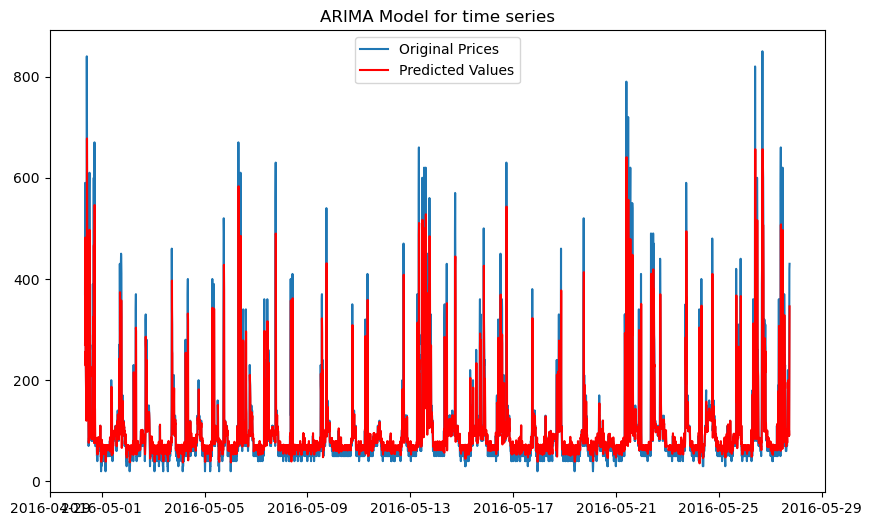

In [61]:
# Plot the original closing prices and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result['Appliances'], label="Original Prices")
plt.plot(result['predicted_mean'], color='red', label="Predicted Values")
plt.title("ARIMA Model for time series")
plt.legend()
plt.show()

In [62]:
error_arima = mean_squared_error(result['Appliances'], result['predicted_mean'])
print('Test MSE: %.3f' % error_arima)
rmse_arima = np.sqrt(error_arima)
print('Test RMSE: %.3f' % rmse_arima)

Test MSE: 3799.801
Test RMSE: 61.643


### LSTM

In [66]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_timeseries)
look_back=24*6    # 144 ten-minute sessions per day

# extracting input pairs from a dataset, storing and reshaping 
train_X,train_y=[],[]
for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    train_X.append(a)
    train_y.append(dataset[i + look_back, 0])
train_X,train_y = np.array(train_X),np.array(train_y)
train_X=np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))
# extracting predicted test data
test_X,test_y=[],[]
for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    test_X.append(a)
    test_y.append(dataset[i + look_back, 0])
test_X,test_y = np.array(test_X),np.array(test_y)
test_X=np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

In [67]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(look_back,1)))
model.add(LSTM(units=32))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 144, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.fit(train_X,train_y,epochs=50,batch_size=32,verbose=2)

Epoch 1/50

613/613 - 27s - loss: 0.0056 - 27s/epoch - 44ms/step
Epoch 2/50
613/613 - 24s - loss: 0.0039 - 24s/epoch - 40ms/step
Epoch 3/50
613/613 - 26s - loss: 0.0038 - 26s/epoch - 43ms/step
Epoch 4/50
613/613 - 26s - loss: 0.0038 - 26s/epoch - 43ms/step
Epoch 5/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 42ms/step
Epoch 6/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 42ms/step
Epoch 7/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 42ms/step
Epoch 8/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 42ms/step
Epoch 9/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 42ms/step
Epoch 10/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 43ms/step
Epoch 11/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 43ms/step
Epoch 12/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 43ms/step
Epoch 13/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 42ms/step
Epoch 14/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 43ms/step
Epoch 15/50
613/613 - 26s - loss: 0.0037 - 26s/epoch - 42ms/step
Epoch 16/50
613/613 - 26s - loss:

In [69]:
# make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([test_y])

613/613 [==============================] - 10s 16ms/step


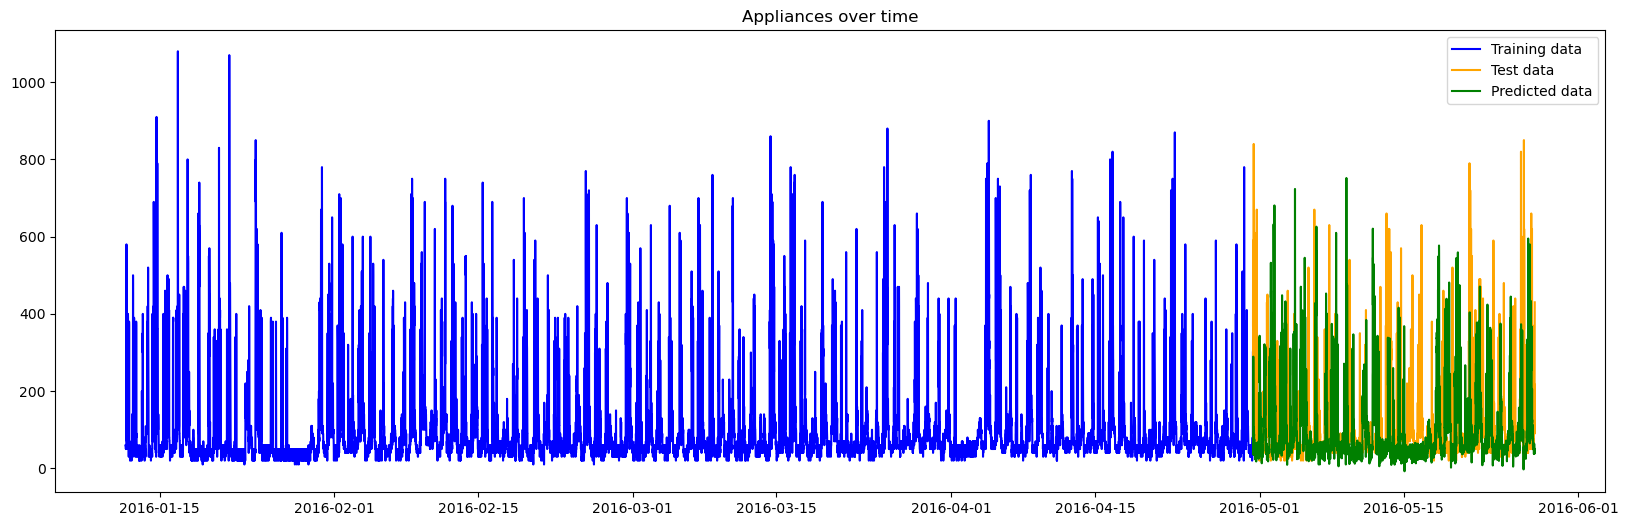

In [70]:
plt.figure(figsize=(20,6))
plt.plot(train_data,color='blue')
plt.plot(test_data,color='orange')
plt.plot(test_data.index, testPredict [:3947], color='green')
plt.legend(['Training data','Test data','Predicted data'])
plt.title('Appliances over time')
plt.show()


In [71]:
# r2 score 
r2_lstm_test = r2_score(testy[0], testPredict[:,0])
r2_lstm_train = r2_score(trainy[0], trainPredict[:,0])

print("R-squared score for LSTM on training set:", r2_lstm_train)
print("R-squared score for LSTM on test set:", r2_lstm_test)

R-squared score for LSTM on training set: 0.6357441993019257
R-squared score for LSTM on test set: 0.6357441993019257


In [72]:
#calculate root mean squared error
error_lstm = mean_squared_error(testy[0],  testPredict[:,0])
print('Test MSE: %.3f' % error_lstm)
rmse_lstm = np.sqrt(error_lstm)
print('Test RMSE: %.3f' % rmse_lstm)

Test MSE: 3821.680
Test RMSE: 61.820


In [73]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 142, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 140, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 70, 64)            0         
 D)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 70, 32)            12416     
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                     

In [74]:
model.fit(train_X,train_y,epochs=50,batch_size=32,verbose=2)

Epoch 1/50
613/613 - 18s - loss: 0.0056 - 18s/epoch - 30ms/step
Epoch 2/50
613/613 - 15s - loss: 0.0040 - 15s/epoch - 24ms/step
Epoch 3/50
613/613 - 15s - loss: 0.0038 - 15s/epoch - 24ms/step
Epoch 4/50
613/613 - 15s - loss: 0.0038 - 15s/epoch - 24ms/step
Epoch 5/50
613/613 - 14s - loss: 0.0037 - 14s/epoch - 24ms/step
Epoch 6/50
613/613 - 14s - loss: 0.0037 - 14s/epoch - 24ms/step
Epoch 7/50
613/613 - 15s - loss: 0.0037 - 15s/epoch - 24ms/step
Epoch 8/50
613/613 - 14s - loss: 0.0036 - 14s/epoch - 24ms/step
Epoch 9/50
613/613 - 15s - loss: 0.0036 - 15s/epoch - 24ms/step
Epoch 10/50
613/613 - 14s - loss: 0.0036 - 14s/epoch - 24ms/step
Epoch 11/50
613/613 - 14s - loss: 0.0036 - 14s/epoch - 24ms/step
Epoch 12/50
613/613 - 15s - loss: 0.0035 - 15s/epoch - 24ms/step
Epoch 13/50
613/613 - 14s - loss: 0.0035 - 14s/epoch - 24ms/step
Epoch 14/50
613/613 - 15s - loss: 0.0035 - 15s/epoch - 24ms/step
Epoch 15/50
613/613 - 14s - loss: 0.0034 - 14s/epoch - 24ms/step
Epoch 16/50
613/613 - 14s - loss: 

In [75]:
# make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([test_y])

613/613 [==============================] - 5s 9ms/step


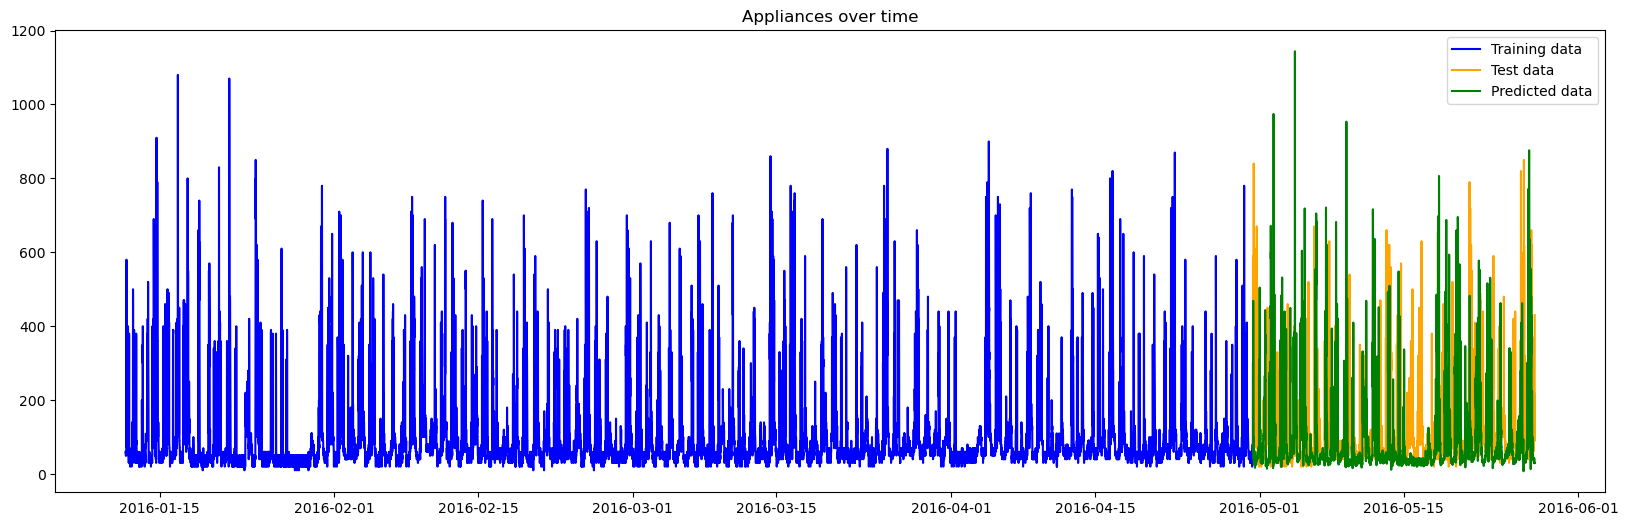

In [76]:
plt.figure(figsize=(20,6))
plt.plot(train_data,color='blue')
plt.plot(test_data,color='orange')
plt.plot(test_data.index, testPredict [:3947], color='green')
plt.legend(['Training data','Test data','Predicted data'])
plt.title('Appliances over time')
plt.show()


In [77]:
# r2 score 
r2_CNN_lstm_test = r2_score(testy[0], testPredict[:,0])
r2_CNN_lstm_train = r2_score(trainy[0], trainPredict[:,0])

print("R-squared score for LSTM on training set:", r2_CNN_lstm_train)
print("R-squared score for LSTM on test set:", r2_CNN_lstm_test)

R-squared score for LSTM on training set: 0.7734744715477174
R-squared score for LSTM on test set: 0.7734744715477174


In [78]:
#calculate root mean squared error
error_lstm_CNN = mean_squared_error(testy[0],  testPredict[:,0])
print('Test MSE: %.3f' % error_lstm_CNN)
rmse_lstm_CNN = np.sqrt(error_lstm_CNN)
print('Test RMSE: %.3f' % rmse_lstm_CNN)

Test MSE: 2376.649
Test RMSE: 48.751


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results


Compare with the results you have obtained in Assignment 1a.

### 5.1 Best Ridge Linear Model

In [79]:
ridge = Ridge(alpha=4.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
ridge_score_train = r2_score(y_train, y_train_pred)
y_test_pred = ridge.predict(X_test)
ridge_score_test = r2_score(y_test, y_test_pred)
rmse_rd = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Coefficients of the Ridge model
ridge_coefficients = ridge.coef_

print("R-squared score for Ridge Regression on training set:", ridge_score_train)
print("R-squared score for Ridge Regression on test set:", ridge_score_test)
print("RMSE for Ridge Regression model:", rmse_rd)
print("Coefficients of the Ridge model:", ridge_coefficients)

R-squared score for Ridge Regression on training set: 0.16119470395640467
R-squared score for Ridge Regression on test set: 0.1675223561339192
RMSE for Ridge Regression model: 91.27255675140448
Coefficients of the Ridge model: [[ 1.56838248e+01  1.23587716e+00  6.29965528e+01 -3.87675095e+01
  -5.41048740e+01  5.13494643e+01  1.33265517e+01 -9.22922900e+00
   7.61246111e-01 -3.04669630e+00  1.93589894e+00  4.30722679e+01
   9.21171164e+00  3.51338610e+00 -8.57207522e+00  1.41355763e+01
  -2.35031486e+01 -2.93137839e+01 -3.93752791e+00 -2.94873404e+01
   2.29756185e-01 -3.27482683e+00  3.44709370e-02  3.44709370e-02]]


### 5.2 Best Random Forest Regressor

In [80]:
# Creating and fitting the Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions on training set
y_train_pred = random_forest.predict(X_train)

# R-squared score on training set
rf_score_train = r2_score(y_train, y_train_pred)

# Predictions on test set
y_test_pred = random_forest.predict(X_test)

# R-squared score on test set
rf_score_test = r2_score(y_test, y_test_pred)

rmse_rf=np.sqrt(mean_squared_error(y_test, y_test_pred))


print("R-squared score for Random Forest Regressor on training set:", rf_score_train)
print("R-squared score for Random Forest Regressor on test set:", rf_score_test)
print("RMSE for Random Forest Regressor model:", rmse_rf)

R-squared score for Random Forest Regressor on training set: 0.8601695587518743
R-squared score for Random Forest Regressor on test set: 0.4918007482425947
RMSE for Random Forest Regressor model: 71.31336625255278


### 5.3 Best Gradient Boosting

In [81]:
# Creating and fitting the Gradient Boosting Regressor model with the best parameters
gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predictions on training set
y_train_pred = gradient_boosting.predict(X_train)

# R-squared score on training set
gb_score_train = r2_score(y_train, y_train_pred)

# Predictions on test set
y_test_pred = gradient_boosting.predict(X_test)

# R-squared score on test set
gb_score_test = r2_score(y_test, y_test_pred)

# Root mean squared error
rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R-squared score for Gradient Boosting Regressor on training set:", gb_score_train)
print("R-squared score for Gradient Boosting Regressor on test set:", gb_score_test)
print("RMSE for Gradient Boosting Regressor model:", rmse_gb)


R-squared score for Gradient Boosting Regressor on training set: 0.5781423767638617
R-squared score for Gradient Boosting Regressor on test set: 0.3768719907146617
RMSE for Gradient Boosting Regressor model: 78.96644067057964


 ### 5.4 Best SVM model

In [82]:
best_svm_model = SVR(C=10, gamma='scale', kernel='rbf')
best_svm_model.fit(X_train, y_train)
y_train_pred = best_svm_model.predict(X_train)
y_test_pred = best_svm_model.predict(X_test)
svm_train_r2_score = r2_score(y_train, y_train_pred)
svm_test_r2_score = r2_score(y_test, y_test_pred)
svm_rmse_test_score = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train R² score:", svm_train_r2_score)
print("Test R² score:", svm_test_r2_score)
print("RMSE test score:", svm_rmse_test_score)

Train R² score: 0.11109352713516563
Test R² score: 0.1153959288796711
RMSE test score: 94.08673403769329


In [85]:
models = [
    {'Name': 'Ridge Regression',
     'Train R² score': ridge_score_train,
     'Test R² score': ridge_score_test,
      'RMSE test score': rmse_rd/100,
    },
    {'Name': 'Random Forest Regressor',
     'Train R² score': rf_score_train,
     'Test R² score': rf_score_test,
     'RMSE test score': rmse_rf/100
    },
    {'Name': 'Gradient Boosting Regressor',
     'Train R² score': gb_score_train,
     'Test R² score': gb_score_test,
     'RMSE test score': rmse_gb/100
    },
    {'Name': 'Support Vector Machine',
    'Train R² score': svm_train_r2_score,
    'Test R² score': svm_test_r2_score,
     'RMSE test score': svm_rmse_test_score/100
    },
    {'Name': 'LSTM',
     'Train R² score': r2_lstm_train,
     'Test R² score': r2_lstm_test,
     'RMSE test score': rmse_lstm/100
    },
    {'Name': 'CNN-LSTM',
     'Train R² score': r2_CNN_lstm_train,
     'Test R² score': r2_CNN_lstm_test,
     'RMSE test score': rmse_lstm_CNN/100
    }
]

models_df = pd.DataFrame(models)
print(models_df)

                          Name  Train R² score  Test R² score  RMSE test score
0             Ridge Regression        0.161195       0.167522         0.912726
1      Random Forest Regressor        0.860170       0.491801         0.713134
2  Gradient Boosting Regressor        0.578142       0.376872         0.789664
3       Support Vector Machine        0.111094       0.115396         0.940867
4                         LSTM        0.635744       0.635744         0.618197
5                     CNN-LSTM        0.773474       0.773474         0.487509


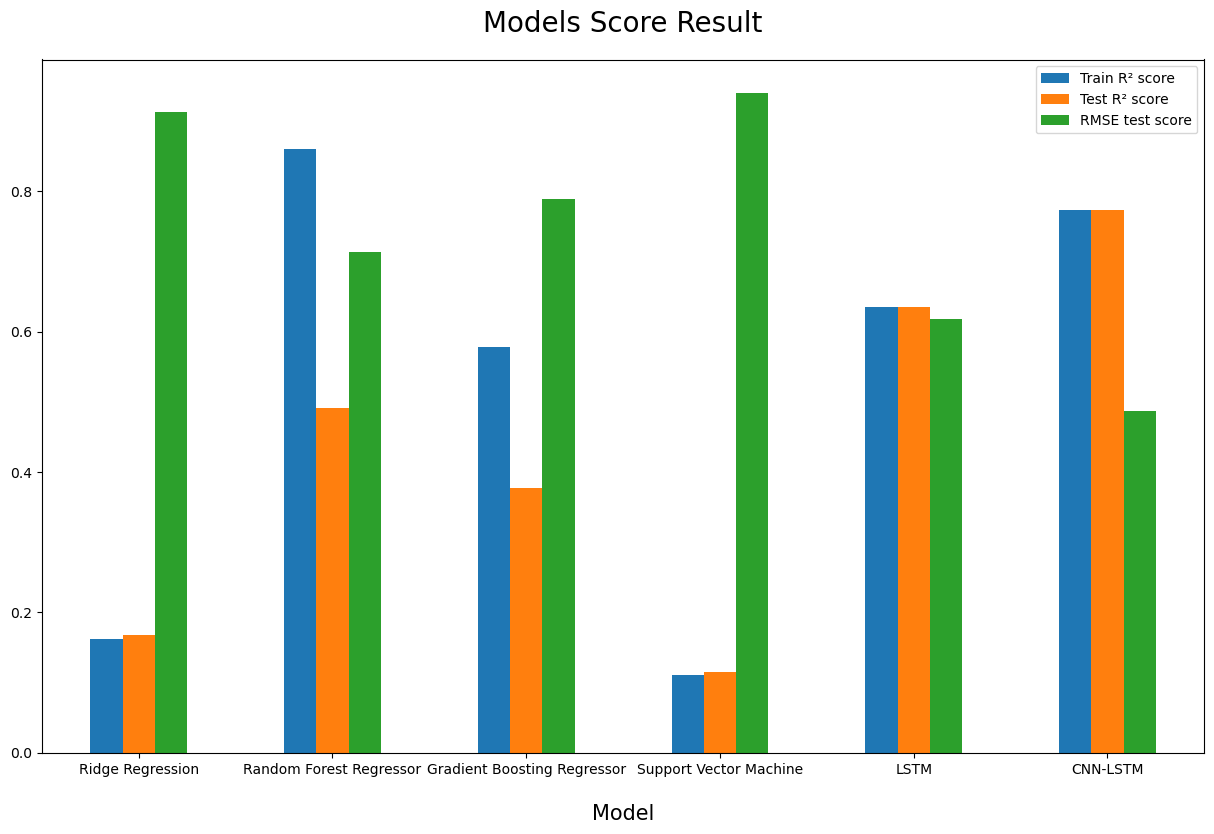

In [86]:
models_df.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Models Score Result', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()


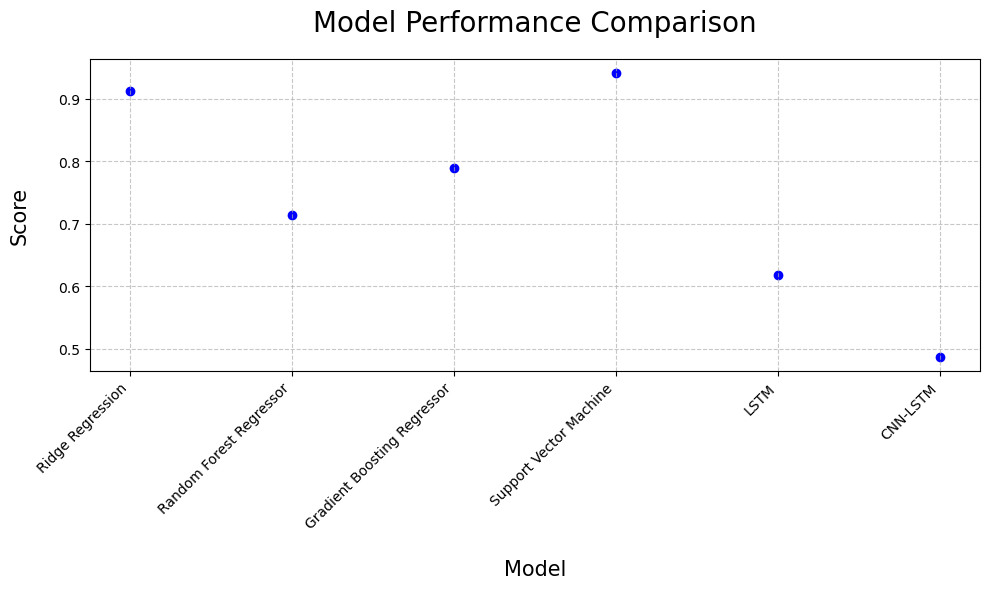

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(models_df['Name'], models_df['RMSE test score'], color='blue')
plt.title('Model Performance Comparison', fontsize=20, pad=20)
plt.xlabel('Model', fontsize=15, labelpad=20)
plt.ylabel('Score', fontsize=15, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

### 7. References